In [4]:
import pandas as pd #for data importing and manupulation
import numpy as np  #for data manupulation and cleaning
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization
%matplotlib inline
from scipy.stats import hmean, gmean

# Visualisations
import matplotlib.pyplot as plt 
import seaborn as sns

# Statistics
from scipy import stats
from scipy.stats import norm, skew
from statistics import mode
from scipy.special import boxcox1p

In [5]:
train = pd.read_csv("c:/users/orisu/financial_inclusion/train.csv")
test = pd.read_csv("c:/users/orisu/financial_inclusion/test.csv")

In [6]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [7]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [8]:
print (train.dtypes)
print('*' * 35)
print (test.dtypes)

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object
***********************************
country                   object
year                       int64
uniqueid                  object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object


In [9]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [10]:
train.describe(include = ['O'])

,country,uniqueid,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524,23524,23524,23524,23524,23524,23524,23524,23524
unique,4,8735,2,2,2,2,6,5,6,10
top,Rwanda,uniqueid_1068,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,4,20212,14343,17454,13877,12831,10749,12791,6437


In [11]:
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [12]:
test.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [13]:
submission = pd.read_csv("c:/users/orisu/financial_inclusion/SubmissionFile.csv")
submission

,uniqueid,bank_account
0,uniqueid_7867 x Kenya,1.0
1,uniqueid_6722 x Kenya,0.0
2,uniqueid_6714 x Kenya,1.0
3,uniqueid_8103 x Kenya,1.0
4,uniqueid_8657 x Kenya,1.0
...,...,...
10081,uniqueid_2311 x Uganda,NaN
10082,uniqueid_2921 x Uganda,NaN
10083,uniqueid_2280 x Uganda,NaN
10084,uniqueid_2285 x Uganda,NaN


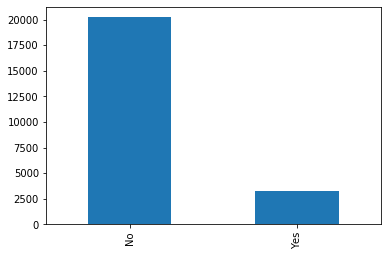

In [14]:
# Target distribution
train.bank_account.value_counts().plot(kind='bar')

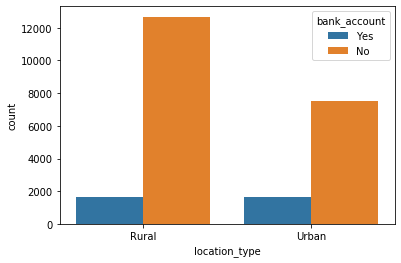

In [15]:
sns.countplot(train['location_type'], hue='bank_account', data=train)

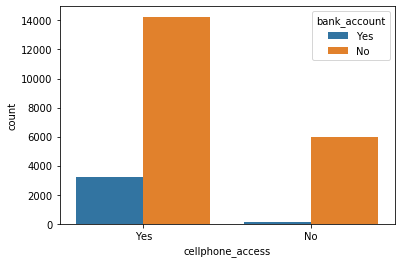

In [16]:
sns.countplot(train['cellphone_access'], hue = 'bank_account', data = train)

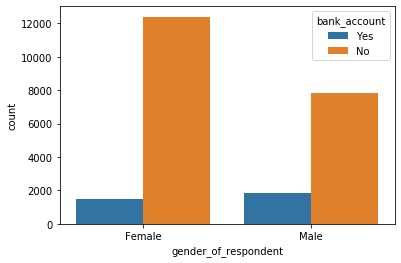

In [17]:
sns.countplot(train['gender_of_respondent'], hue = 'bank_account', data = train)

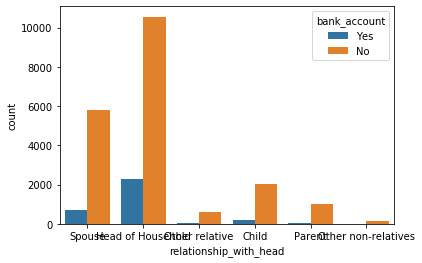

In [18]:
sns.countplot(train['relationship_with_head'], hue = 'bank_account', data = train)

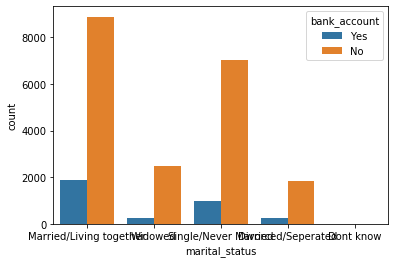

In [19]:
sns.countplot(train['marital_status'], hue = 'bank_account', data = train)

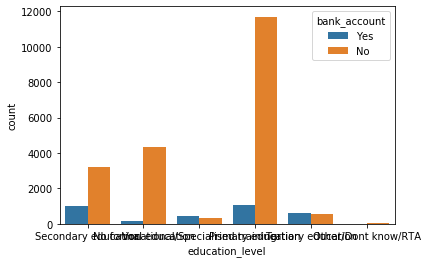

In [20]:
sns.countplot(train['education_level'], hue = 'bank_account', data = train)

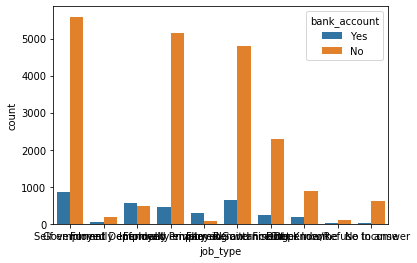

In [21]:
sns.countplot(train['job_type'], hue = 'bank_account', data = train)

In [22]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [23]:
train.describe(include = ['O'])

,country,uniqueid,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524,23524,23524,23524,23524,23524,23524,23524,23524
unique,4,8735,2,2,2,2,6,5,6,10
top,Rwanda,uniqueid_1068,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,4,20212,14343,17454,13877,12831,10749,12791,6437


In [24]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [25]:
from sklearn.preprocessing import LabelEncoder
# Convert target label to numerical Data
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


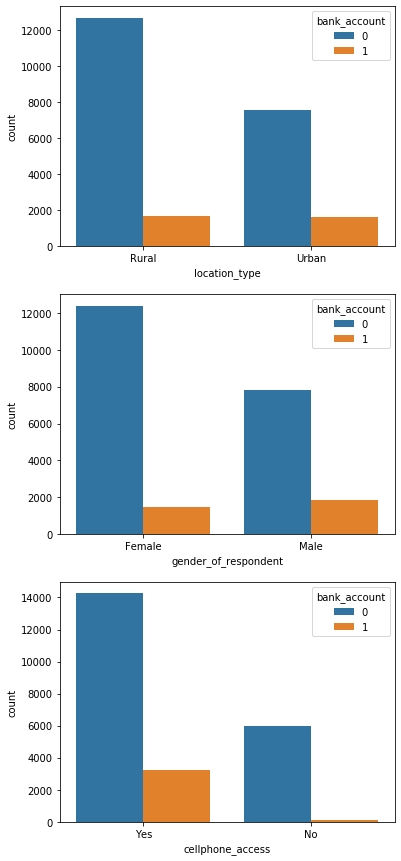

In [26]:
f, axes = plt.subplots(3, 1, figsize=[6, 15])

sns.countplot('location_type', hue= 'bank_account', data=train, ax=axes[0])
sns.countplot('gender_of_respondent', hue= 'bank_account', data=train, ax=axes[1])
sns.countplot('cellphone_access', hue= 'bank_account', data=train, ax=axes[2])

In [27]:
train['year_'] = train['year']
test['year_'] = test['year']
# Convert the following numerical labels from integer to float
float_array = train[['household_size', 'age_of_respondent', 'year_']].values.astype(float)
float_array = test[['household_size', 'age_of_respondent', 'year_']].values.astype(float)

In [28]:
# Data preprocessing 
# convert categorical features to numerical features
# categorical features to be converted by One Hot Encoding
train['country_'] = train['country']
test['country_'] = test['country']

categ = ['relationship_with_head', 'marital_status', 'education_level', 'job_type', 'country_']
# One Hot Encoding conversion
train = pd.get_dummies(train, prefix_sep='_', columns = categ)

test = pd.get_dummies(test, prefix_sep='_', columns = categ)

# Labelncoder conversion
train['location_type'] = le.fit_transform(train['location_type'])
train['cellphone_access'] = le.fit_transform(train['cellphone_access'])
train['gender_of_respondent'] = le.fit_transform(train['gender_of_respondent'])


test['location_type'] = le.fit_transform(test['location_type'])
test['cellphone_access'] = le.fit_transform(test['cellphone_access'])
test['gender_of_respondent'] = le.fit_transform(test['gender_of_respondent'])

In [29]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,2018,...,0,0,0,0,0,1,1,0,0,0
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,2018,...,1,0,0,0,0,0,1,0,0,0
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,2018,...,0,0,0,0,0,1,1,0,0,0
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,2018,...,0,0,0,0,0,0,1,0,0,0
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,2018,...,0,1,0,0,0,0,1,0,0,0


In [30]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,Kenya,2018,uniqueid_6056,1,1,3,30,1,2018,0,...,0,0,0,0,0,0,1,0,0,0
1,Kenya,2018,uniqueid_6060,1,1,7,51,1,2018,0,...,0,0,0,0,0,0,1,0,0,0
2,Kenya,2018,uniqueid_6065,0,0,3,77,0,2018,0,...,0,0,0,0,1,0,1,0,0,0
3,Kenya,2018,uniqueid_6072,0,0,6,39,0,2018,0,...,0,0,0,0,1,0,1,0,0,0
4,Kenya,2018,uniqueid_6073,1,0,3,16,1,2018,1,...,0,0,0,0,1,0,1,0,0,0


In [31]:
#Separate training features from target
X_train = train.drop(['year', 'uniqueid', 'bank_account', 'country'], axis=1)
y_train = train['bank_account']

X_test = test.drop(['year', 'uniqueid', 'country'], axis=1)

#rescale X_train and X_test
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_rescaled = scaler.fit_transform(X_train)
X_test_rescaled = scaler.fit_transform(X_test)

In [32]:

# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_val, y_Train, y_val = train_test_split(X_train_rescaled, y_train, stratify = y_train, test_size = 0.2, random_state=42)

In [33]:
import lightgbm as lgb
#from lightgbm import lgbmclassifier

In [34]:
X = train.drop(['year', 'uniqueid', 'bank_account', 'country'], axis=1)
y = train['bank_account']

x_test = test.drop(['year', 'uniqueid', 'country'], axis=1)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
# Initiating LGBMRegressor model
model_lgb = lgb.LGBMRegressor(objective='regression',
                              num_leaves=6,
                              learning_rate=0.003, 
                              n_estimators=1080,
                              max_bin=75, 
                              bagging_fraction=0.80,
                              bagging_freq=5, 
                              feature_fraction=0.232,
                              feature_fraction_seed=9, 
                              bagging_seed=9,
                              min_data_in_leaf=6, 
                              min_sum_hessian_in_leaf=11)

In [38]:
#model.fit(X_train, y_train, cat_features=categorical_features_indices, eval_set=(X_val, y_val))
model_lgb.fit(X_train, y_train, eval_set=(X_val, y_val))

[1]	valid_0's l2: 0.125249
[2]	valid_0's l2: 0.125218
[3]	valid_0's l2: 0.125102
[4]	valid_0's l2: 0.125064
[5]	valid_0's l2: 0.124977
[6]	valid_0's l2: 0.124913
[7]	valid_0's l2: 0.124846
[8]	valid_0's l2: 0.124749
[9]	valid_0's l2: 0.124715
[10]	valid_0's l2: 0.124682
[11]	valid_0's l2: 0.124652
[12]	valid_0's l2: 0.124609
[13]	valid_0's l2: 0.124541
[14]	valid_0's l2: 0.124476
[15]	valid_0's l2: 0.124377
[16]	valid_0's l2: 0.124327
[17]	valid_0's l2: 0.124259
[18]	valid_0's l2: 0.124156
[19]	valid_0's l2: 0.124084
[20]	valid_0's l2: 0.124025
[21]	valid_0's l2: 0.123958
[22]	valid_0's l2: 0.123905
[23]	valid_0's l2: 0.123862
[24]	valid_0's l2: 0.123808
[25]	valid_0's l2: 0.123753
[26]	valid_0's l2: 0.123671
[27]	valid_0's l2: 0.123595
[28]	valid_0's l2: 0.123543
[29]	valid_0's l2: 0.123451
[30]	valid_0's l2: 0.123404
[31]	valid_0's l2: 0.123355
[32]	valid_0's l2: 0.123247
[33]	valid_0's l2: 0.123188
[34]	valid_0's l2: 0.123108
[35]	valid_0's l2: 0.12307
[36]	valid_0's l2: 0.123005
[3

[317]	valid_0's l2: 0.108537
[318]	valid_0's l2: 0.108524
[319]	valid_0's l2: 0.108474
[320]	valid_0's l2: 0.108425
[321]	valid_0's l2: 0.1084
[322]	valid_0's l2: 0.108364
[323]	valid_0's l2: 0.108347
[324]	valid_0's l2: 0.108334
[325]	valid_0's l2: 0.108297
[326]	valid_0's l2: 0.108277
[327]	valid_0's l2: 0.108244
[328]	valid_0's l2: 0.108211
[329]	valid_0's l2: 0.108196
[330]	valid_0's l2: 0.10816
[331]	valid_0's l2: 0.108121
[332]	valid_0's l2: 0.108078
[333]	valid_0's l2: 0.108058
[334]	valid_0's l2: 0.10804
[335]	valid_0's l2: 0.107993
[336]	valid_0's l2: 0.107947
[337]	valid_0's l2: 0.107908
[338]	valid_0's l2: 0.107856
[339]	valid_0's l2: 0.107834
[340]	valid_0's l2: 0.107793
[341]	valid_0's l2: 0.107763
[342]	valid_0's l2: 0.10774
[343]	valid_0's l2: 0.107719
[344]	valid_0's l2: 0.107705
[345]	valid_0's l2: 0.107677
[346]	valid_0's l2: 0.107648
[347]	valid_0's l2: 0.107612
[348]	valid_0's l2: 0.107604
[349]	valid_0's l2: 0.107561
[350]	valid_0's l2: 0.107504
[351]	valid_0's l2:

[650]	valid_0's l2: 0.0997182
[651]	valid_0's l2: 0.0997026
[652]	valid_0's l2: 0.0996883
[653]	valid_0's l2: 0.0996665
[654]	valid_0's l2: 0.0996593
[655]	valid_0's l2: 0.0996535
[656]	valid_0's l2: 0.0996306
[657]	valid_0's l2: 0.0996091
[658]	valid_0's l2: 0.0995791
[659]	valid_0's l2: 0.0995733
[660]	valid_0's l2: 0.0995465
[661]	valid_0's l2: 0.0995307
[662]	valid_0's l2: 0.0995149
[663]	valid_0's l2: 0.0995042
[664]	valid_0's l2: 0.0994877
[665]	valid_0's l2: 0.0994657
[666]	valid_0's l2: 0.0994464
[667]	valid_0's l2: 0.099431
[668]	valid_0's l2: 0.0994111
[669]	valid_0's l2: 0.0993946
[670]	valid_0's l2: 0.0993879
[671]	valid_0's l2: 0.099379
[672]	valid_0's l2: 0.0993649
[673]	valid_0's l2: 0.0993546
[674]	valid_0's l2: 0.0993308
[675]	valid_0's l2: 0.0993062
[676]	valid_0's l2: 0.0992829
[677]	valid_0's l2: 0.0992659
[678]	valid_0's l2: 0.0992399
[679]	valid_0's l2: 0.0992171
[680]	valid_0's l2: 0.0991978
[681]	valid_0's l2: 0.099178
[682]	valid_0's l2: 0.0991629
[683]	valid_0

[942]	valid_0's l2: 0.0957618
[943]	valid_0's l2: 0.0957469
[944]	valid_0's l2: 0.095735
[945]	valid_0's l2: 0.0957256
[946]	valid_0's l2: 0.0957158
[947]	valid_0's l2: 0.0957044
[948]	valid_0's l2: 0.0956934
[949]	valid_0's l2: 0.0956841
[950]	valid_0's l2: 0.0956766
[951]	valid_0's l2: 0.0956674
[952]	valid_0's l2: 0.0956603
[953]	valid_0's l2: 0.0956564
[954]	valid_0's l2: 0.0956458
[955]	valid_0's l2: 0.0956361
[956]	valid_0's l2: 0.0956243
[957]	valid_0's l2: 0.0956097
[958]	valid_0's l2: 0.0955982
[959]	valid_0's l2: 0.0955953
[960]	valid_0's l2: 0.0955899
[961]	valid_0's l2: 0.0955746
[962]	valid_0's l2: 0.0955626
[963]	valid_0's l2: 0.0955521
[964]	valid_0's l2: 0.0955379
[965]	valid_0's l2: 0.0955321
[966]	valid_0's l2: 0.0955214
[967]	valid_0's l2: 0.0955086
[968]	valid_0's l2: 0.0954985
[969]	valid_0's l2: 0.0954897
[970]	valid_0's l2: 0.0954809
[971]	valid_0's l2: 0.0954782
[972]	valid_0's l2: 0.0954647
[973]	valid_0's l2: 0.0954566
[974]	valid_0's l2: 0.0954431
[975]	valid

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.232, feature_fraction_seed=9,
              importance_type='split', learning_rate=0.003, max_bin=75,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=6, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=1080, n_jobs=-1,
              num_leaves=6, objective='regression', random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [39]:
#y_pred = model.predict_proba(test)[:, 1]
y_pred = model_lgb.predict(X_val)

In [40]:
from sklearn.metrics import roc_auc_score

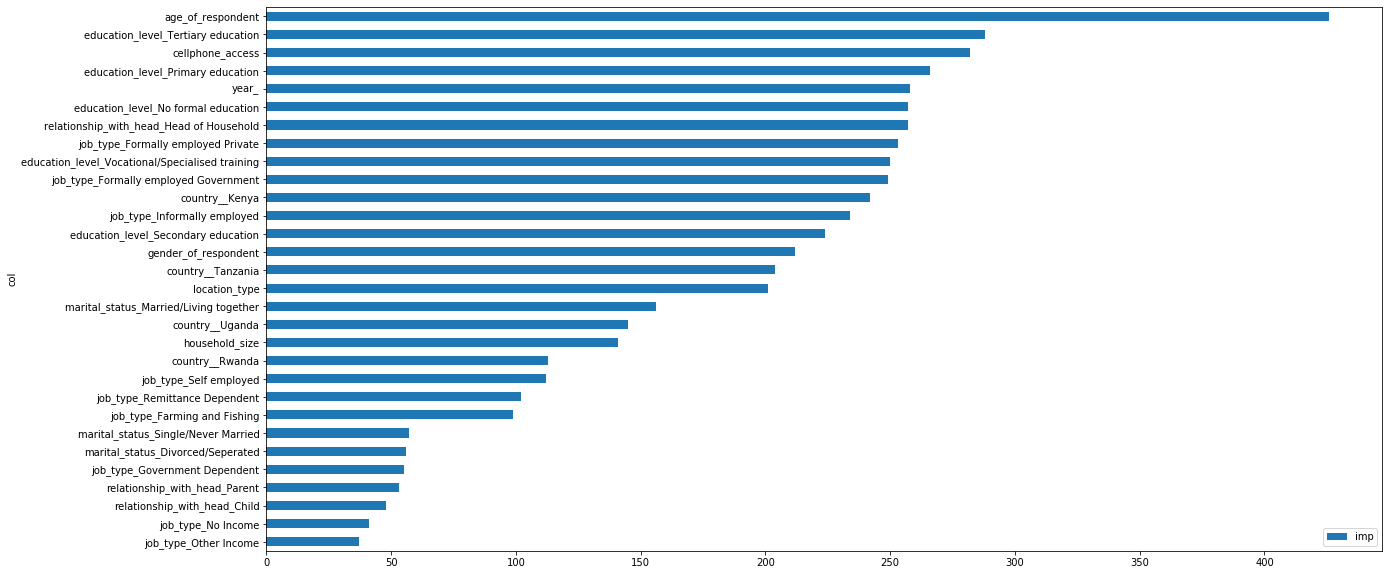

In [41]:
fea_imp = pd.DataFrame({'imp':model_lgb.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.savefig('catboost_feature_importance.png')

In [42]:
test.bank_account = model_lgb.predict(x_test)

C:\Users\orisu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [43]:
# create submission DataFrame
submission_df3 = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
"bank_account": test.bank_account})

In [44]:
submission_df3.head()

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,0.625914
1,uniqueid_6060 x Kenya,0.621685
2,uniqueid_6065 x Kenya,0.056664
3,uniqueid_6072 x Kenya,0.081596
4,uniqueid_6073 x Kenya,0.097638


In [45]:
# Create submission csv file
submission_df3.to_csv('F06.csv', index = False)